In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

## Entropy - compare shannon entropy between wildtype and mutants, use the controls to calculate the efficiency of methylation per base

In [2]:
load_dir =  "ARS305"

In [112]:
ARS305_wt = np.loadtxt("ARS305/wt_mat_Megalodon_repIII_ARS305_end_LexA.txt")

#replicate 2
ARS305_wt_rep2 = np.genfromtxt("ARS305/ARS305_wt_REP2_noNA.csv", dtype = int, delimiter = ",")
#feature annotation

#ARS305_anno = pd.read_csv("ARS305/Features_from ARS305_end_LexA _(31 .. 1124).txt", sep  = "\t", 
#                          header = None, index_col = 0)
#ARS305_anno.columns = ["position", "length"]

#ARS305_anno = pd.read_csv("ARS305/coordinates_ARS305.txt", sep  = "\t", 
#                          header = None, index_col = 0)

ARS305_anno = pd.read_csv(load_dir + "/ARS305_80bp.txt", sep  = "\t", 
                          header = None, index_col = 0)
ARS305_anno.columns = ["position"]

ARS305_anno.index = ARS305_anno.index.astype("string")
ARS305_anno.index = ARS305_anno.index.str.strip()

ARS305_anno["pos_start"] = ARS305_anno.position.str.split("-").str[0].astype(int) -1
ARS305_anno["pos_stop"] = ARS305_anno.position.str.split("-").str[1].astype(int) -1

ARS305_anno["length"] = ARS305_anno.pos_stop - ARS305_anno.pos_start

ARS305_dies6_rep1 = np.loadtxt("ARS305/DIES6_ALL_REP1_ARS305_end_LexA.txt")
ARS305_dies6_rep2 = np.genfromtxt("ARS305/DIES6_ARS305_REP2_780READS.csv", dtype = int, delimiter = ",")

ARS305_disw2_rep1 = np.genfromtxt("ARS305/ARS305_disw2_rep1_780READS_noNA.csv", dtype = int,
                                 delimiter = ",")
ARS305_disw2_rep2 = np.genfromtxt("ARS305/ARS305_disw2_rep2_780READS_noNA.csv", dtype = int, delimiter = ",")

In [113]:
# load data for plasmid spike-ins
wt_rep3_naked_plasmid = np.loadtxt("controls/wt_mat_Megalodon_repIII_naked_plasmid.txt")
wt_rep2_naked_plasmid = np.loadtxt("controls/naked_plasmid_wt_rep2_1000reads.txt")

dies6_rep1_naked = np.loadtxt("controls/DIES6_ALL_REP1_naked_plasmid.txt")
dies6_rep2_naked = np.loadtxt("controls/DIES6_rep2_780READS_naked_plasmid.txt")

disw2_rep1_naked = np.loadtxt("controls/naked_plasmid_disw2_rep1_clean_780READS.csv")
disw2_rep2_naked = np.loadtxt("controls/naked_plasmid_disw2_rep2_clean_780_reads.csv")

In [522]:
ARS305_wt.shape

(780, 1084)

In [393]:
overlap_plasmid_wt3 = wt_rep3_naked_plasmid[:, 4081:4791]
overlap_plasmid_wt2 = wt_rep2_naked_plasmid[:, 4081:4791]

overlap_plasmid_dies6_1 = dies6_rep1_naked[:, 4081:4791]
overlap_plasmid_dies6_2 = dies6_rep2_naked[:, 4081:4791]

overlap_plasmid_disw2_1 = disw2_rep1_naked[:, 4081:4791]
overlap_plasmid_disw2_2 = disw2_rep2_naked[:, 4081:4791]

overlap_ARS305_wt3 = ARS305_wt[:, 222:932]
overlap_ARS305_wt2 = ARS305_wt_rep2[:, 222:932]

overlap_ARS305_dies6_1 = ARS305_dies6_rep1[:, 222:932]
overlap_ARS305_dies6_2 = ARS305_dies6_rep2[:, 222:932]
overlap_ARS305_disw2_1 = ARS305_disw2_rep1[:, 222:932]
overlap_ARS305_disw2_2 = ARS305_disw2_rep2[:, 222:932]

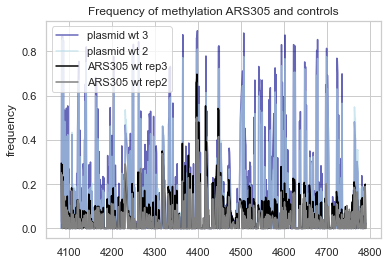

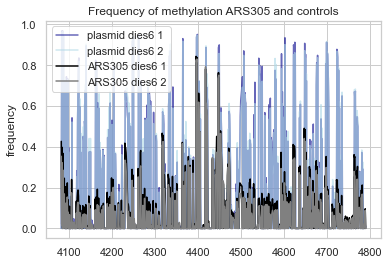

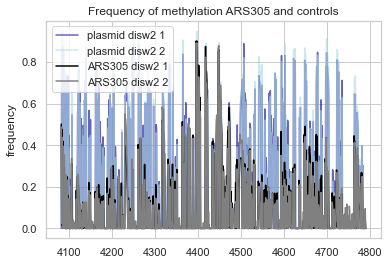

In [398]:
N=1

sns.set(font_scale=1)
sns.set_style("whitegrid")

sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_wt3.mean(axis=0),
                             np.ones(N)/N, mode ="same"), 
             color = "darkblue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_wt2.mean(axis=0),
                             np.ones(N)/N, mode ="same"), 
             color = "lightblue", label = "plasmid wt 2", alpha = 0.6)
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_ARS305_wt3.mean(axis=0), 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt rep3")
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_ARS305_wt2.mean(axis=0), 
                             np.ones(N)/N, mode ="same"), 
             color = "grey", label = "ARS305 wt rep2")
plt.ylabel("frequency")
plt.title("Frequency of methylation ARS305 and controls")
#plt.savefig(load_dir + "/plots/methyl_efficiency_wt.tif", dpi=300)
plt.show()

#show efficiency for dies6
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_dies6_1.mean(axis=0),
                             np.ones(N)/N, mode ="same"), 
             color = "darkblue", label = "plasmid dies6 1", alpha = 0.6)
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_dies6_2.mean(axis=0),
                             np.ones(N)/N, mode ="same"), 
             color = "lightblue", label = "plasmid dies6 2", alpha = 0.6)
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_ARS305_dies6_1.mean(axis=0), 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 dies6 1")
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_ARS305_dies6_2.mean(axis=0), 
                             np.ones(N)/N, mode ="same"), 
             color = "grey", label = "ARS305 dies6 2")
plt.ylabel("frequency")
plt.title("Frequency of methylation ARS305 and controls")
#plt.savefig(load_dir + "/plots/methyl_efficiency_dies6.tif", dpi=300)
plt.show()

#show efficiency for disw2
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_disw2_1.mean(axis=0),
                             np.ones(N)/N, mode ="same"), 
             color = "darkblue", label = "plasmid disw2 1", alpha = 0.6)
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_disw2_2.mean(axis=0),
                             np.ones(N)/N, mode ="same"), 
             color = "lightblue", label = "plasmid disw2 2", alpha = 0.6)
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_ARS305_disw2_1.mean(axis=0), 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 disw2 1")
sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_ARS305_disw2_2.mean(axis=0), 
                             np.ones(N)/N, mode ="same"), 
             color = "grey", label = "ARS305 disw2 2")
plt.ylabel("frequency")
plt.title("Frequency of methylation ARS305 and controls")
#plt.savefig(load_dir + "/plots/methyl_efficiency_disw2.tif", dpi=300)
plt.show()

In [403]:
overlap_plasmid_disw2_1.mean(axis=0).min() #0.0
(overlap_plasmid_disw2_1.mean(axis=0) == 0).sum() #360
(overlap_plasmid_disw2_2.mean(axis=0) == 0).sum() #356

356

In [404]:
(overlap_plasmid_disw2_1.mean(axis=0)<0.1).sum()

470

## Test whether the efficiency is sequence dependent for the plasmid samples

In [407]:
seq = "gacagaccacttatgacagtatttcaggccgctcttataaaatgacatgttaacaaacagttctgattattcgccttttgacaggacgataatgtaaatagttgtggtagtatcattcaggtatgtaactgtttactttgtatcgcttgaaaaaaataagcatttcagagccttctttggagctcaagtggattgaggccacagcaagaccggccagtttgaatgctcaactcttcaaaagaaattcctcaaatatgtccagtttcatgtactgtccggtgtgatttattattttttatttactttgtagttcttaaagctaagatttttttctttgataaattcttgttttcatatcctaaaattaaagggaaaataaacaatacataacaaaacatataaaaaccaacacaataaaaaaaaggatcaaatactcattaaagtaacttacacgggggctaaaaacggagtttgatgaatattcacaagataaaaatcatatgtatgtttctgatatatcgatatacaatcaaacactttcaagaatttgtttgtagactttttgctagagacctcatcaaagtgctaccaactaagatcaacttatacttcttttagagaaaatttttttcaatgtactccaaagagatttagatcctgtctcttcctcttcctcttcctcgaaagtcaaagaaaaatcagagtctccc"

eff_df = pd.DataFrame({"wt_rep3": overlap_plasmid_wt3.mean(axis=0)}, index=range(4081, 4791))


eff_df["base"] = [letter for letter in seq]
eff_df["wt_rep2"] = overlap_plasmid_wt2.mean(axis=0)
eff_df["dies6_rep1"] = overlap_plasmid_dies6_1.mean(axis=0)
eff_df["dies6_rep2"] = overlap_plasmid_dies6_2.mean(axis=0)
eff_df["disw2_rep1"] = overlap_plasmid_disw2_1.mean(axis=0)
eff_df["disw2_rep2"] = overlap_plasmid_disw2_2.mean(axis=0)

eff_df_melt = eff_df.melt(id_vars="base", var_name= "sample", value_name="efficiency")

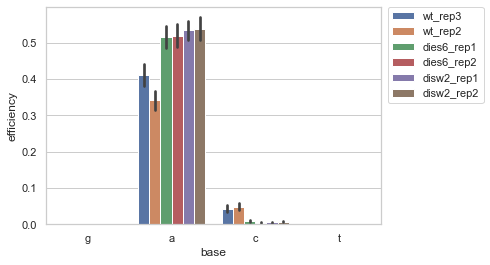

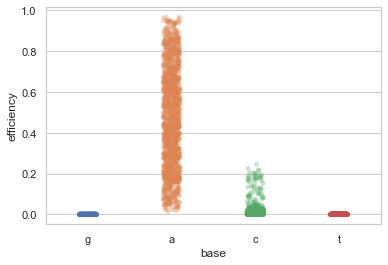

In [408]:
sns.barplot(data = eff_df_melt, x = "base", y = "efficiency", hue = "sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()

sns.stripplot(data = eff_df_melt, x = "base", y = "efficiency", alpha=0.3)#, hue = "sample")#, inner="points")
#plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()

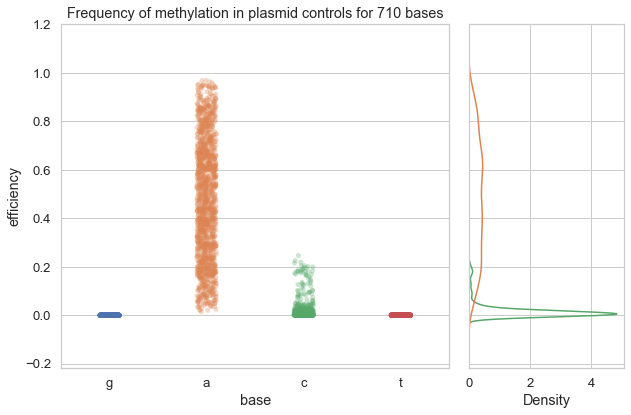

In [409]:
# specify plot layouts with different width using subplots()
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

f, axs = plt.subplots(1,2,
                      figsize=(9,6),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[2.5,1]))
# make scatterplot with legends
sns.stripplot(data = eff_df_melt, x = "base", y = "efficiency", alpha=0.3, ax= axs[0])
axs[0].set_title("Frequency of methylation in plasmid controls for 710 bases")
axs
# make densityplot with kdeplot without legends
sns.kdeplot(data= eff_df_melt,
                y="efficiency",
                hue="base",
                ax=axs[1],
                legend=False, warn_singular=False)
f.tight_layout()

In [420]:
#The enzyme is methylating CG or GC. How many of the Cs in the sequence stretch are combined with a G?
seq.count("c") #125 out of 710

seq.count("cg") + seq.count("gc") #25

25

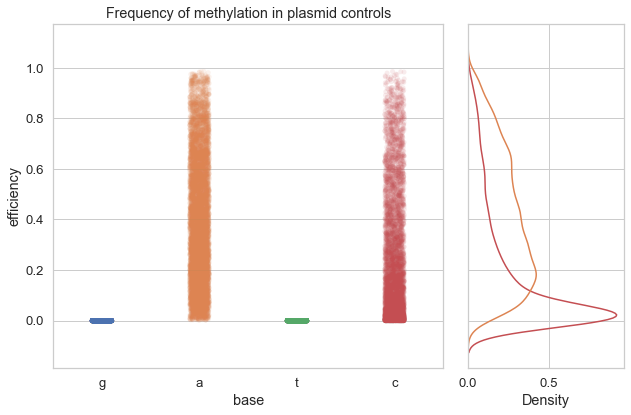

In [421]:
## Plot this for the whole sequence of the plasmid:
#prepare the data:

seq= "ggaagatcctctagagtcgacccgagatcatatcactgtggacgttgatgaaagaatacgttattctttcatcaaatcgtggggctctagggtagttgcgtttctctcattgggacactgaacctcattttccaacattttggtcatgtaagaggcgacaggctcatcgcaggtgggtgcatcaacatggtagtacctggaccaagcgctacattgagtccctcctggataaacaccgctacaatattgtctttggacgtttgcccaaaccatatcttttgaataccaaagctggaccacattgtatggcctaatcattggtgctaccataatactggattgggaaacagtctggttaatttttttcaaccaatttttcttatctagcaatgatttaataaacctgaaatctaaattgtcttcgttagcgtctgtgtcataatctacaattgagtactgtgacgtccaattatatggcaccgagatggggaatctgtccggtgtttcgtcgctgttatccttctcctccctccaaatgaattcctgcagcccgggggatccactagttctagagcggccgccaccgcggtggagctccagcttttgttccctttagtgagggttaatttcgagcttggcgtaatcatggtcatagctgtttcctgtgtgaaattgttatccgctcacaattccacacaacatacgagccggaagcataaagtgtaaagcctggggtgcctaatgagtgagctaactcacattaattgcgttgcgctcactgcccgctttccagtcgggaaacctgtcgtgccagctgcattaatgaatcggccaacgcgcggggagaggcggtttgcgtattgggcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaaggacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagttaccaatgcttaatcagtgaggcacctatctcagcgatctgtctatttcgttcatccatagttgcctgactccccgtcgtgtagataactacgatacgggagggcttaccatctggccccagtgctgcaatgataccgcgagacccacgctcaccggctccagatttatcagcaataaaccagccagccggaagggccgagcgcagaagtggtcctgcaactttatccgcctccatccagtctattaattgttgccgggaagctagagtaagtagttcgccagttaatagtttgcgcaacgttgttgccattgctacaggcatcgtggtgtcacgctcgtcgtttggtatggcttcattcagctccggttcccaacgatcaaggcgagttacatgatcccccatgttgtgcaaaaaagcggttagctccttcggtcctccgatcgttgtcagaagtaagttggccgcagtgttatcactcatggttatggcagcactgcataattctcttactgtcatgccatccgtaagatgcttttctgtgactggtgagtactcaaccaagtcattctgagaatagtgtatgcggcgaccgagttgctcttgcccggcgtcaatacgggataataccgcgccacatagcagaactttaaaagtgctcatcattggaaaacgttcttcggggcgaaaactctcaaggatcttaccgctgttgagatccagttcgatgtaacccactcgtgcacccaactgatcttcagcatcttttactttcaccagcgtttctgggtgagcaaaaacaggaaggcaaaatgccgcaaaaaagggaataagggcgacacggaaatgttgaatactcatactcttcctttttcaatattattgaagcatttatcagggttattgtctcatgagcggatacatatttgaatgtatttagaaaaataaacaaataggggttccgcgcacatttccccgaaaagtgccacctaaattgtaagcgttaatattttgttaaaattcgcgttaaatttttgttaaatcagctcattttttaaccaataggccgaaatcggcaaaatcccttataaatcaaaagaatagaccgagatagggttgagtgttgttccagtttggaacaagagtccactattaaagaacgtggactccaacgtcaaagggcgaaaaaccgtctatcagggcgatggcccactacgtgaaccatcaccctaatcaagttttttggggtcgaggtgccgtaaagcactaaatcggaaccctaaagggagcccccgatttagagcttgacggggaaagccggcgaacgtggcgagaaaggaagggaagaaagcgaaaggagcgggcgctagggcgctggcaagtgtagcggtcacgctgcgcgtaaccaccacacccgccgcgcttaatgcgccgctacagggcgcgtcccattcgccattcaggctgcgcaactgttgggaagggcgatcggtgcgggcctcttcgctattacgccagctggcgaaagggggatgtgctgcaaggcgattaagttgggtaacgccagggttttcccagtcacgacgttgtaaaacgacggccagtgaattgtaatacgactcactatagggcgaattgggtaccgggccccccctcgaggtcgacggtatcgataagcttttttgggtcctttgttttcgttgtttcagtctggataaattttaagttaccattatcgaaggcacttttgtacttgtcactaattaaagatgcaatgtcagcggggatactcatttttattttaatttttacttttctgtttgttctaaaatctatctaaactggctttcaagatcaatctattgtcttttaaggtaaactttaaattggaaataatagtaatgttagttccttcattttaaccttgtattgtatttcctttgcgtgatgaaaaaaaaactgaaaaagagaaaaataagaaaatcttctagaacgttccgaaacaggacacttagcacacaaatacagaataggaaagtaaaaggcaatatatgaatgcagtgcttgtaactggtgcttgtatccaagaatagcttcttgctgtaggttatgggaatatcgtgtaagctggggtgacttttgagctattcgcgacgcccgacgccgtaataactactttctcgacccgagatcatatcactgtggacgttgatgaaagaatacgttattctttcatcaaatcgtggtcgaccggcatgcaagctccctcgaggacagaccacttatgacagtatttcaggccgctcttataaaatgacatgttaacaaacagttctgattattcgccttttgacaggacgataatgtaaatagttgtggtagtatcattcaggtatgtaactgtttactttgtatcgcttgaaaaaaataagcatttcagagccttctttggagctcaagtggattgaggccacagcaagaccggccagtttgaatgctcaactcttcaaaagaaattcctcaaatatgtccagtttcatgtactgtccggtgtgatttattattttttatttactttgtagttcttaaagctaagatttttttctttgataaattcttgttttcatatcctaaaattaaagggaaaataaacaatacataacaaaacatataaaaaccaacacaataaaaaaaaggatcaaatactcattaaagtaacttacacgggggctaaaaacggagtttgatgaatattcacaagataaaaatcatatgtatgtttctgatatatcgatatacaatcaaacactttcaagaatttgtttgtagactttttgctagagacctcatcaaagtgctaccaactaagatcaacttatacttcttttagagaaaatttttttcaatgtactccaaagagatttagatcctgtctcttcctcttcctcttcctcgaaagtcaaagaaaaatcagagtctccc"

#seq="tggaagatcctctagagtcgacccgagatcatatcactgtggacgttgatgaaagaatacgttattctttcatcaaatcgtggggctctagggtagttgcgtttctctcattgggacactgaacctcattttccaacattttggtcatgtaagaggcgacaggctcatcgcaggtgggtgcatcaacatggtagtacctggaccaagcgctacattgagtccctcctggataaacaccgctacaatattgtctttggacgtttgcccaaaccatatcttttgaataccaaagctggaccacattgtatggcctaatcattggtgctaccataatactggattgggaaacagtctggttaatttttttcaaccaatttttcttatctagcaatgatttaataaacctgaaatctaaattgtcttcgttagcgtctgtgtcataatctacaattgagtactgtgacgtccaattatatggcaccgagatggggaatctgtccggtgtttcgtcgctgttatccttctcctccctccaaatgaattcctgcagcccgggggatccactagttctagagcggccgccaccgcggtggagctccagcttttgttccctttagtgagggttaatttcgagcttggcgtaatcatggtcatagctgtttcctgtgtgaaattgttatccgctcacaattccacacaacatacgagccggaagcataaagtgtaaagcctggggtgcctaatgagtgagctaactcacattaattgcgttgcgctcactgcccgctttccagtcgggaaacctgtcgtgccagctgcattaatgaatcggccaacgcgcggggagaggcggtttgcgtattgggcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaaggacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagttaccaatgcttaatcagtgaggcacctatctcagcgatctgtctatttcgttcatccatagttgcctgactccccgtcgtgtagataactacgatacgggagggcttaccatctggccccagtgctgcaatgataccgcgagacccacgctcaccggctccagatttatcagcaataaaccagccagccggaagggccgagcgcagaagtggtcctgcaactttatccgcctccatccagtctattaattgttgccgggaagctagagtaagtagttcgccagttaatagtttgcgcaacgttgttgccattgctacaggcatcgtggtgtcacgctcgtcgtttggtatggcttcattcagctccggttcccaacgatcaaggcgagttacatgatcccccatgttgtgcaaaaaagcggttagctccttcggtcctccgatcgttgtcagaagtaagttggccgcagtgttatcactcatggttatggcagcactgcataattctcttactgtcatgccatccgtaagatgcttttctgtgactggtgagtactcaaccaagtcattctgagaatagtgtatgcggcgaccgagttgctcttgcccggcgtcaatacgggataataccgcgccacatagcagaactttaaaagtgctcatcattggaaaacgttcttcggggcgaaaactctcaaggatcttaccgctgttgagatccagttcgatgtaacccactcgtgcacccaactgatcttcagcatcttttactttcaccagcgtttctgggtgagcaaaaacaggaaggcaaaatgccgcaaaaaagggaataagggcgacacggaaatgttgaatactcatactcttcctttttcaatattattgaagcatttatcagggttattgtctcatgagcggatacatatttgaatgtatttagaaaaataaacaaataggggttccgcgcacatttccccgaaaagtgccacctaaattgtaagcgttaatattttgttaaaattcgcgttaaatttttgttaaatcagctcattttttaaccaataggccgaaatcggcaaaatcccttataaatcaaaagaatagaccgagatagggttgagtgttgttccagtttggaacaagagtccactattaaagaacgtggactccaacgtcaaagggcgaaaaaccgtctatcagggcgatggcccactacgtgaaccatcaccctaatcaagttttttggggtcgaggtgccgtaaagcactaaatcggaaccctaaagggagcccccgatttagagcttgacggggaaagccggcgaacgtggcgagaaaggaagggaagaaagcgaaaggagcgggcgctagggcgctggcaagtgtagcggtcacgctgcgcgtaaccaccacacccgccgcgcttaatgcgccgctacagggcgcgtcccattcgccattcaggctgcgcaactgttgggaagggcgatcggtgcgggcctcttcgctattacgccagctggcgaaagggggatgtgctgcaaggcgattaagttgggtaacgccagggttttcccagtcacgacgttgtaaaacgacggccagtgaattgtaatacgactcactatagggcgaattgggtaccgggccccccctcgaggtcgacggtatcgataagcttttttgggtcctttgttttcgttgtttcagtctggataaattttaagttaccattatcgaaggcacttttgtacttgtcactaattaaagatgcaatgtcagcggggatactcatttttattttaatttttacttttctgtttgttctaaaatctatctaaactggctttcaagatcaatctattgtcttttaaggtaaactttaaattggaaataatagtaatgttagttccttcattttaaccttgtattgtatttcctttgcgtgatgaaaaaaaaactgaaaaagagaaaaataagaaaatcttctagaacgttccgaaacaggacacttagcacacaaatacagaataggaaagtaaaaggcaatatatgaatgcagtgcttgtaactggtgcttgtatccaagaatagcttcttgctgtaggttatgggaatatcgtgtaagctggggtgacttttgagctattcgcgacgcccgacgccgtaataactactttctcgacccgagatcatatcactgtggacgttgatgaaagaatacgttattctttcatcaaatcgtggtcgaccggcatgcaagctccctcgaggacagaccacttatgacagtatttcaggccgctcttataaaatgacatgttaacaaacagttctgattattcgccttttgacaggacgataatgtaaatagttgtggtagtatcattcaggtatgtaactgtttactttgtatcgcttgaaaaaaataagcatttcagagccttctttggagctcaagtggattgaggccacagcaagaccggccagtttgaatgctcaactcttcaaaagaaattcctcaaatatgtccagtttcatgtactgtccggtgtgatttattattttttatttactttgtagttcttaaagctaagatttttttctttgataaattcttgttttcatatcctaaaattaaagggaaaataaacaatacataacaaaacatataaaaaccaacacaataaaaaaaaggatcaaatactcattaaagtaacttacacgggggctaaaaacggagtttgatgaatattcacaagataaaaatcatatgtatgtttctgatatatcgatatacaatcaaacactttcaagaatttgtttgtagactttttgctagagacctcatcaaagtgctaccaactaagatcaacttatacttcttttagagaaaatttttttcaatgtactccaaagagatttagatcctgtctcttcctcttcctcttcctcgaaagtcaaagaaaaatcagagtctcc"
eff_df = pd.DataFrame({"wt_rep3": wt_rep3_naked_plasmid.mean(axis=0)}, index=range(4791))


eff_df["base"] = [letter for letter in seq]
eff_df["wt_rep2"] = wt_rep2_naked_plasmid.mean(axis=0)
eff_df["dies6_rep1"] = dies6_rep1_naked.mean(axis=0)
eff_df["dies6_rep2"] = dies6_rep2_naked.mean(axis=0)
eff_df["disw2_rep1"] = disw2_rep1_naked.mean(axis=0)
eff_df["disw2_rep2"] = disw2_rep2_naked.mean(axis=0)

eff_df_melt = eff_df.melt(id_vars="base", var_name= "sample", value_name="efficiency")

# specify plot layouts with different width using subplots()
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

f, axs = plt.subplots(1,2,
                      figsize=(9,6),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[2.5,1]))
# make scatterplot with legends
sns.stripplot(data = eff_df_melt, x = "base", y = "efficiency", alpha=0.1, ax= axs[0])
axs[0].set_title("Frequency of methylation in plasmid controls")
axs
# make densityplot with kdeplot without legends
sns.kdeplot(data= eff_df_melt,
                y="efficiency",
                hue="base",
                ax=axs[1],
                legend=False, warn_singular=False)
f.tight_layout()
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid.tif", dpi=300)

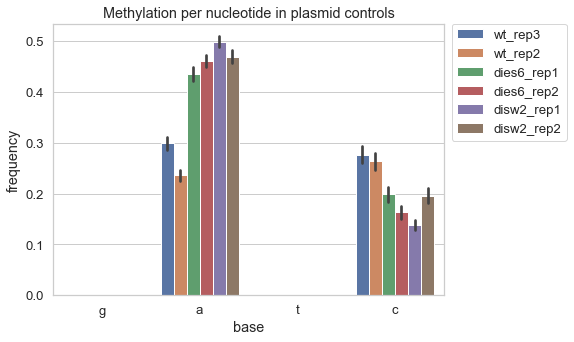

In [422]:
plt.figure(figsize=(7,5))
sns.barplot(data=eff_df_melt, x = "base", y = "efficiency", hue = "sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.title("Methylation per nucleotide in plasmid controls")
plt.ylabel("frequency")
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid_per_sample.tif", dpi=300, bbox_inches='tight')
plt.show()

In [424]:
seq.count("c") #1078 out of 4791 (22%)

seq.count("cg") + seq.count("gc") #513

513

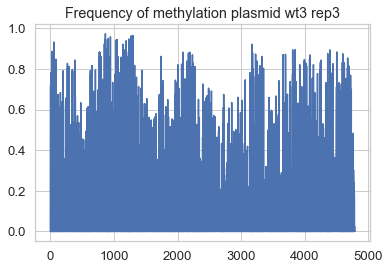

Text(0.5, 0, 'frequency')

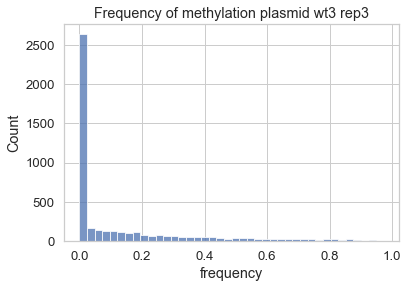

In [425]:
sns.lineplot(x = range(4791), y = wt_rep3_naked_plasmid.mean(axis=0))
plt.title("Frequency of methylation plasmid wt3 rep3")
plt.show()

sns.histplot(wt_rep3_naked_plasmid.mean(axis=0))
plt.title("Frequency of methylation plasmid wt3 rep3")
plt.xlabel("frequency")

In [426]:
#define the mean methylation per position of the plasmid control as the efficiency of methylation per base E(x)
#then, the probabilitity P of a genomic position x being nucleosome-free is:
#P(x) = f(x) + (1-f(x))(1-E(X)) , with f(x) being the frequency of methylation at a genomic position x

prob_wt3 = overlap_ARS305_wt3.mean(axis=0) + (1- overlap_ARS305_wt3.mean(axis=0))*(1-overlap_plasmid_wt3.mean(axis=0)) #0 -> (1-overlap_plasmid_wt_rep3.mean(axis=0))

(overlap_ARS305_wt2.mean(axis=0) > overlap_ARS305_wt2.mean(axis=0)).sum() #0

prob_wt3.min(), prob_wt3.max()

(0.10641025641025637, 1.0)

Text(0.5, 1.0, 'probability of being nucleosome free, ARS305 wt rep3')

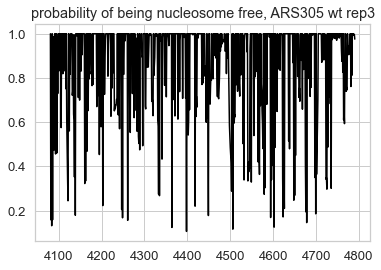

In [428]:
sns.lineplot(x = range(4081,4791), 
             y = prob_wt3, color = "black")
plt.title("probability of being nucleosome free, ARS305 wt rep3")

In [429]:
(prob_wt3==1).sum() #346

#If we use the effiency of methylation to correct for unseen ones, in ~50 % of the positions, 
#the probability of being nucleosome free is 1. 
#The efficiency of the methylation reaction seems to be a aproblem here.

#If we leave out this correction, the probability of neucleosome-free is between 0 und 0.69.

346

In [430]:
#Entropy for position x is then:
#S = -(P*logP + (1-P)*log(1-P))

def shannon_entropy(P):
    return -(P*np.log(P) - (1-P)*np.log(1-P))

shannon_entropy(prob_wt3)

/var/folders/8_/bz0k3bkj70x4ylymbhp02t4n19gw28/T/ipykernel_4368/1322712110.py:5: RuntimeWarning: divide by zero encountered in log
  return -(P*np.log(P) - (1-P)*np.log(1-P))
/var/folders/8_/bz0k3bkj70x4ylymbhp02t4n19gw28/T/ipykernel_4368/1322712110.py:5: RuntimeWarning: invalid value encountered in multiply
  return -(P*np.log(P) - (1-P)*np.log(1-P))


array([        nan,  0.14674535, -0.07581029,  0.1444252 ,         nan,
        0.14674547, -0.04272674, -0.04681979,  0.01617149, -0.04895568,
               nan,         nan,  0.02664059,         nan,         nan,
        0.02381573, -0.04904921, -0.12358805,         nan,         nan,
       -0.14665479,         nan,         nan,         nan, -0.0518923 ,
       -0.04584027,         nan,         nan, -0.14670958, -0.14586594,
               nan, -0.14660981,         nan, -0.13076327,         nan,
               nan, -0.13122782,         nan, -0.06692456,  0.02164857,
        0.08988605,  0.13244848,         nan,         nan, -0.03676745,
       -0.03556678, -0.14562089,         nan,         nan,         nan,
               nan, -0.1206737 , -0.12711511, -0.02061734, -0.0803094 ,
       -0.06535592,  0.08614946, -0.02066147,  0.14597786,         nan,
               nan,         nan, -0.03676921,         nan,         nan,
       -0.11645861,         nan,         nan, -0.11151938,      

In [462]:
# Does smoothing helps against zero-inflation of control?
#pool replicates of the same condition

overlap_plasmid_wt_pooled = np.concatenate((overlap_plasmid_wt3, overlap_plasmid_wt2), axis = 0)
overlap_plasmid_dies6_pooled = np.concatenate((overlap_plasmid_dies6_1, overlap_plasmid_dies6_2), axis = 0)
overlap_plasmid_disw2_pooled = np.concatenate((overlap_plasmid_disw2_1, overlap_plasmid_disw2_2), axis = 0)

overlap_ARS305_wt_pooled = np.concatenate((overlap_ARS305_wt3, overlap_ARS305_wt2), axis = 0)
overlap_ARS305_dies6_pooled = np.concatenate((overlap_ARS305_dies6_1, overlap_ARS305_dies6_2), axis = 0)
overlap_ARS305_disw2_pooled = np.concatenate((overlap_ARS305_disw2_1, overlap_ARS305_disw2_2), axis = 0)
    
    
N=10
def smooth(array):
        return np.convolve(array, np.ones(N)/N, mode = "same")
    
overlap_plasmid_wt_smooth = np.apply_along_axis(smooth, 1, overlap_plasmid_wt_pooled)
overlap_ARS305_wt_smooth = np.apply_along_axis(smooth, 1, overlap_ARS305_wt_pooled)

overlap_plasmid_dies6_smooth = np.apply_along_axis(smooth, 1, overlap_plasmid_dies6_pooled)
overlap_ARS305_dies6_smooth = np.apply_along_axis(smooth, 1, overlap_ARS305_dies6_pooled)

overlap_plasmid_disw2_smooth = np.apply_along_axis(smooth, 1, overlap_plasmid_disw2_pooled)
overlap_ARS305_disw2_smooth = np.apply_along_axis(smooth, 1, overlap_ARS305_disw2_pooled)

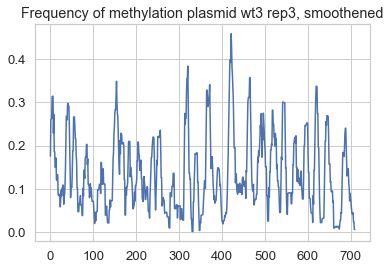

Text(0.5, 0, 'frequency')

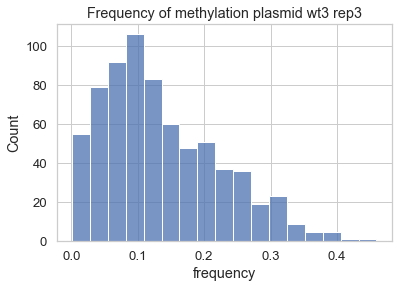

In [463]:
sns.lineplot(x = range(710), y = overlap_plasmid_wt_smooth.mean(axis=0))
plt.title("Frequency of methylation plasmid wt3 rep3, smoothened")
plt.show()

sns.histplot(overlap_plasmid_wt_smooth.mean(axis=0))
plt.title("Frequency of methylation plasmid wt3 rep3")
plt.xlabel("frequency")

In [464]:
#define the mean methylation per position of the plasmid control as the efficiency of methylation per base E(x)
#then, the probabilitity P of a genomic position x being nucleosome-free is:
#P(x) = f(x) + (1-f(x))(1-E(X)) , with f(x) being the frequency of methylation at a genomic position x

prob_wt_smooth =overlap_ARS305_wt_smooth.mean(axis=0) + (1- overlap_ARS305_wt_smooth.mean(axis=0))*(1-overlap_plasmid_wt_smooth.mean(axis=0))

(overlap_ARS305_wt_smooth.mean(axis=0) > overlap_plasmid_wt_smooth.mean(axis=0)).sum()

55

In [465]:
prob_wt_smooth.min(), prob_wt_smooth.max()

(0.5761086956521734, 0.9989846341738379)

Text(0.5, 1.0, 'probability of being nucleosome free, smoothened ARS305 wt rep3')

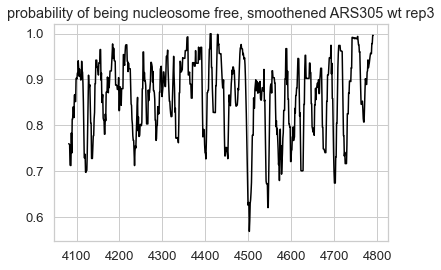

In [466]:
sns.lineplot(x = range(4082,4791), 
             y = prob_wt3_smooth, color = "black")
plt.title("probability of being nucleosome free, smoothened ARS305 wt rep3")

Text(0.5, 1.0, 'Entropy of smoothened ARS305 wt rep3')

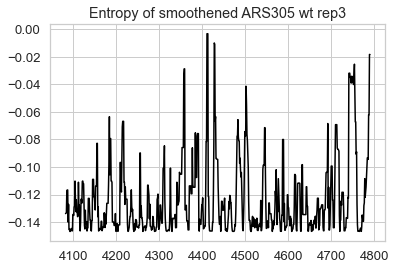

In [467]:
#Entropy for position x is then:
#S = -(P*logP + (1-P)*log(1-P))

def shannon_entropy(P):
    return -(P*np.log(P) - (1-P)*np.log(1-P))

shannon_entropy(prob_wt3_smooth)

sns.lineplot(x = range(4082,4791), 
             y = shannon_entropy(prob_wt3_smooth), color = "black")
plt.title("Entropy of smoothened ARS305 wt rep3")

In [468]:
def calculate_entropy(sample, control):        
    P = sample.mean(axis=0) + (1- sample.mean(axis=0))*(1-control.mean(axis=0))
    Entropy = -(P*np.log(P) - (1-P)*np.log(1-P))
    return Entropy

entropy_ARS305_wt = calculate_entropy(overlap_ARS305_wt_smooth, overlap_plasmid_wt_smooth)
entropy_ARS305_dies6 = calculate_entropy(overlap_ARS305_dies6_smooth, overlap_plasmid_dies6_smooth)
entropy_ARS305_disw2 = calculate_entropy(overlap_ARS305_disw2_smooth, overlap_plasmid_disw2_smooth)

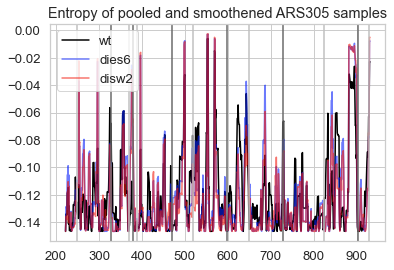

In [469]:
sns.lineplot(x = range(222,932), 
             y = entropy_ARS305_wt, color = "black", label ="wt")
sns.lineplot(x = range(222,932), 
             y = entropy_ARS305_dies6, color = "#0a22fa", alpha = 0.6, label = "dies6")
sns.lineplot(x = range(222,932), 
             y = entropy_ARS305_disw2, color = "#f2180c", alpha = 0.6, label = "disw2")
plt.title("Entropy of pooled and smoothened ARS305 samples")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")

In [490]:
segments = ARS305_anno.drop(columns = "position")
segments.drop(index = ["+2ns", "+2L", "+3ns"], inplace =True)

#list comprehension to catch the sum of entropy per annotated feature:
array_list = [entropy_ARS305_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]].mean(axis=0) for 
 index in segments.index]

segments["wt"] = pd.Series(array_list, index = segments.index)

array_list = [entropy_ARS305_dies6[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]].mean(axis=0) for 
 index in segments.index]

segments["dies6"] = pd.Series(array_list, index = segments.index)

array_list = [entropy_ARS305_disw2[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]].mean(axis=0) for 
 index in segments.index]

segments["disw2"] = pd.Series(array_list, index = segments.index)

In [492]:
segments["feature"] = segments.index
plot_data = segments.melt(id_vars = "feature", value_vars= ["wt", "dies6", "disw2"], var_name= "sample",
                         value_name = "entropy")


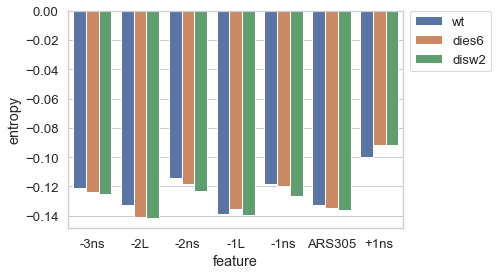

In [493]:
sns.barplot(data=plot_data, x = "feature", y = "entropy", hue = "sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

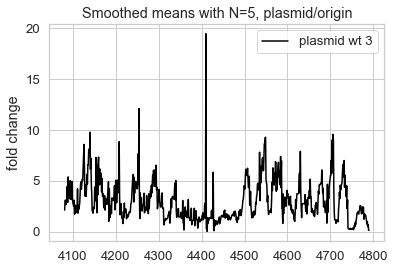

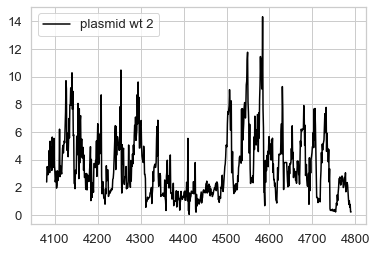

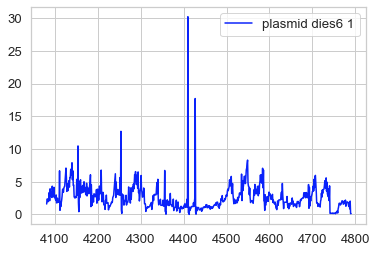

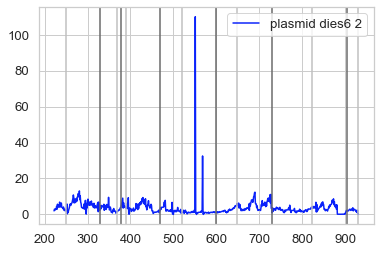

In [494]:
N=10

sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_wt3.mean(axis=0), np.ones(N)/N, mode ="same")/np.convolve(
    overlap_ARS305_wt3.mean(axis=0), np.ones(N)/N, mode ="same"), 
             color = "black", label = "plasmid wt 3")
plt.ylabel("fold change")
plt.title("Smoothed means with N=5, plasmid/origin")
plt.show()

sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_wt2.mean(axis=0), np.ones(N)/N, mode ="same")/np.convolve(
    overlap_ARS305_wt2.mean(axis=0), np.ones(N)/N, mode ="same"), 
             color = "black", label = "plasmid wt 2")
plt.show()

sns.lineplot(x = range(4081,4791), 
             y = np.convolve(overlap_plasmid_dies6_1.mean(axis=0), np.ones(N)/N, mode ="same")/np.convolve(
    overlap_ARS305_dies6_1.mean(axis=0), np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "plasmid dies6 1")
plt.show()

sns.lineplot(x = range(222,932), 
             y = np.convolve(overlap_plasmid_dies6_2.mean(axis=0), np.ones(N)/N, mode ="same")/np.convolve(
    overlap_ARS305_dies6_2.mean(axis=0), np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "plasmid dies6 2")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
plt.show()

## How sparse can we expect the signal to be in the annotated features?

In [519]:
ARS305_anno

seq_char = ARS305_anno.drop(columns = "position")

array_list = [seq[seq_char.loc[index, "pos_start"]:seq_char.loc[index, "pos_stop"]] for 
 index in seq_char.index]

seq_char["sequence"] = pd.Series(array_list, index = seq_char.index)

seq_char["a_percent"] = [row.count("a")/len(row)*100 for row in seq_char["sequence"]]
seq_char["t_percent"] = [row.count("t")/len(row)*100 for row in seq_char["sequence"]]
seq_char["cg_percent"] = [row.count("cg")/len(row)*100 for row in seq_char["sequence"]]
seq_char["gc_percent"] = [row.count("gc")/len(row)*100 for row in seq_char["sequence"]]
seq_char["gc_content"] = [(row.count("c")+row.count("g"))/len(row)*100 for row in seq_char["sequence"]]
seq_char.drop(columns = "sequence", inplace=True)

In [520]:
seq_char

,pos_start,pos_stop,length,a_percent,t_percent,cg_percent,gc_percent,gc_content
0,,,,,,,,
-3ns,74,154,80,21.25,33.750000,2.500000,2.500000,45.000000
-2L,179,199,20,30.00,25.000000,0.000000,0.000000,45.000000
-2ns,249,329,80,26.25,31.250000,1.250000,5.000000,42.500000
-1L,369,379,10,20.00,50.000000,0.000000,0.000000,30.000000
-1ns,389,469,80,31.25,35.000000,3.750000,1.250000,33.750000
ARS305,519,599,80,17.50,20.000000,6.250000,8.750000,62.500000
+1ns,649,729,80,31.25,26.250000,3.750000,6.250000,42.500000
+2ns,824,904,80,11.25,22.500000,15.000000,15.000000,66.250000
+2L,929,959,30,30.00,23.333333,6.666667,6.666667,46.666667
